## Importing libraries

In [135]:
from IPython.display import display
import numpy as np
import csv
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

## Parsing data from CSV file

In [52]:
# Parse data as csv file
data = []
with open('./data/time_series_covid_19_confirmed.csv', mode='r') as file:
    csv_reader = csv.reader(file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        temp = {}
        if line_count==0:
            keys = row
        else:
            for i in range(len(keys)):
                temp[keys[i]] = row[i]
            data_sample = {key: temp[key] for key in keys}
            del temp
            data.append(data_sample)
        line_count += 1
        
# filter unwanted keys
filtered_out_keys = ['Province/State', 'Lat', 'Long']
new_data = []
for sample in data:
    for key in filtered_out_keys:
        del(sample[key])
    new_data.append(sample)
data = new_data

# turn time series data into array
new_data = []
for i in range(len(data)):
    sample = {'Country/Region': '', 'vec': []}
    for k in data[i]:
        if k == 'Country/Region':
            sample[k] = data[i][k]
        else:
            sample['vec'].append(int(data[i][k]))
    sample['vec'] = np.array(sample['vec'])
    new_data.append(sample)
data = new_data

# find unique country values
unique_countries = []
for i in range(len(data)):
    if data[i]['Country/Region'] not in unique_countries:
        unique_countries.append(data[i]['Country/Region'])  

# aggregate data from same country
new_data = {}
for i in range(len(unique_countries)):
    new_data[unique_countries[i]] = np.zeros(30)
for i in range(len(data)):
    new_data[data[i]['Country/Region']] += data[i]['vec']
data = new_data

## Pick a country

In [137]:
# Create widgets for map
country_widget = widgets.Dropdown(
    options=unique_countries,
    #value='',
    description='Country:',
    disabled=False,
)
display(country_widget)

Dropdown(description='Country:', options=('Mainland China', 'Thailand', 'Japan', 'South Korea', 'Taiwan', 'US'…

## Pick order of polynomials

In [145]:
order_widget = widgets.BoundedIntText(
    value=1,
    min=1,
    max=10,
    step=1,
    description='Order:',
    disabled=False
)
display(order_widget)

BoundedIntText(value=1, description='Order:', max=10, min=1)

## Curve fitting

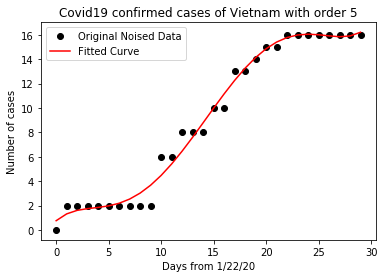

In [150]:
country = country_widget.value
order = order_widget.value
t = np.arange(30)
coefs = poly.polyfit(t, data[country], order)
ffit = poly.polyval(t, coefs)
plt.figure()
plt.plot(x, data[country], 'ko', label="Original Noised Data")
plt.plot(x, ffit, 'r-', label="Fitted Curve")
plt.legend()
plt.title('Covid19 confirmed cases of ' + country + ' with order ' + str(order))
plt.xlabel('Days from 1/22/20')
plt.ylabel('Number of cases')
plt.show()